# Intro

- Tutorial source: https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
- This tutorial will do sentiment analysis using six US airlines tweets data
- Dataset source: https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv

# Let's Begin

## Importing the Dataset

In [3]:
#resolve macOS 10.12 SSL issue
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data Analysis

In [6]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


### Percentage of Public Tweets per Each Airline

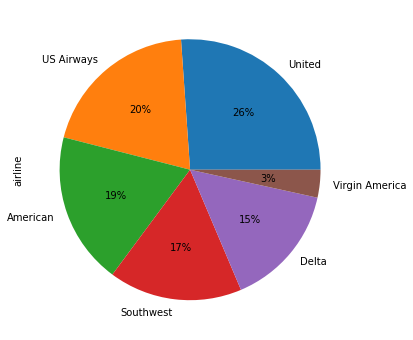

In [7]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

### Distribution of Sentiments Across All The Tweets

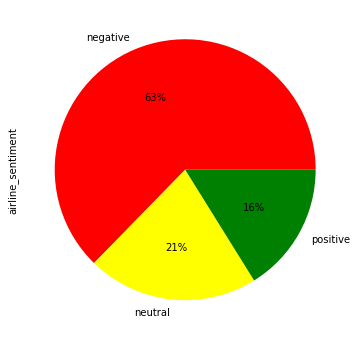

In [8]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

### Distribution of Sentiment for Each Individual Airline

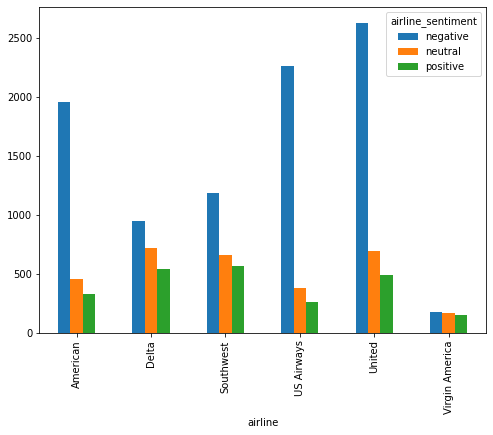

In [9]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

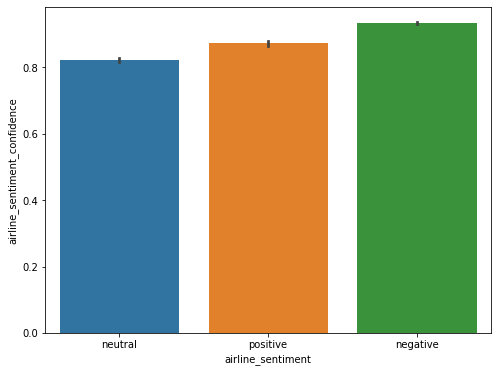

In [10]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

## Data Cleaning

In [11]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [12]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

## Representing Text in Numeric Form

### TF-IDF

- Combination of two terms, `Terms Frequence` and `Inverse Document Frequency`

In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

## Dividing Data into Training and Test Sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

## Training the Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
predictions = text_classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


From the output, we can see that the algorithm used achieved and accuracy of 75.30%

# Extra: Topic Modeling

Source: https://stackabuse.com/python-for-nlp-topic-modeling/

- Topic modeling is an unsupervised technique that intends to analyze large volumes of text data by clustering the documents into groups
- In case of topic modeling, the text data don't have any labels attached to it.
- Rather, topic modeling tries to group the documents into clusters based on similar characteristics.

## Latend Dirichlet Allocation (LDA)

- The LDA is based on two general assumptions
 - Documents that have similar words usually have the same topic
 - Documents that have groups of words frequently occuring together usually have the same topic

### Dataset

- Source: https://www.kaggle.com/sdxingaijing/topic-model-lda-algorithm/data

### LDA for Topic Modeling

In [20]:
import pandas as pd
import numpy as np

reviews_datasets = pd.read_csv(r'data/Reviews.csv')
reviews_datasets = reviews_datasets.head(20000)
reviews_datasets = reviews_datasets.dropna()

In [21]:
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [22]:
reviews_datasets['Text'][350]

'These chocolate covered espresso beans are wonderful!  The chocolate is very dark and rich and the "bean" inside is a very delightful blend of flavors with just enough caffine to really give it a zing.'

#### Count Vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(reviews_datasets['Text'].values.astype('U'))

In [25]:
doc_term_matrix

<20000x14546 sparse matrix of type '<class 'numpy.int64'>'
	with 594703 stored elements in Compressed Sparse Row format>

#### Use LDA

In [26]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [27]:
"""
Randomly fetches 10 words from our vocabulary
"""

import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

expenses
radio
impressive
woudn
extravagant
crowded
approximate
clumped
oysters
merry


In [29]:
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [30]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

water
great
just
drink
sugar
good
flavor
taste
like
tea


#### 10 Words with Highest Probabilities

In [31]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['water', 'great', 'just', 'drink', 'sugar', 'good', 'flavor', 'taste', 'like', 'tea']


Top 10 words for topic #1:
['br', 'chips', 'love', 'flavor', 'chocolate', 'just', 'great', 'taste', 'good', 'like']


Top 10 words for topic #2:
['just', 'drink', 'orange', 'sugar', 'soda', 'water', 'like', 'juice', 'product', 'br']


Top 10 words for topic #3:
['gluten', 'eat', 'free', 'product', 'like', 'dogs', 'treats', 'dog', 'br', 'food']


Top 10 words for topic #4:
['cups', 'price', 'great', 'like', 'amazon', 'good', 'br', 'product', 'cup', 'coffee']




#### Transform

- Add a column to the original data frame that will store the topic for the text

In [32]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(20000, 5)

In [33]:
reviews_datasets['Topic'] = topic_values.argmax(axis=1)

In [34]:
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,3
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


## Non-Negative Matrix Factorization (NMF) for Topic Modeling

In [36]:
import pandas as pd
import numpy as np

reviews_datasets = pd.read_csv(r'data/Reviews.csv')
reviews_datasets = reviews_datasets.head(20000)
reviews_datasets = reviews_datasets.dropna()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(reviews_datasets['Text'].values.astype('U'))

In [38]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [39]:
# import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

surpassed
pondered
networks
des
dyes
harrogate
true
whiskey
initially
house


In [41]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

really
chocolate
love
flavor
just
product
taste
great
good
like


In [42]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['really', 'chocolate', 'love', 'flavor', 'just', 'product', 'taste', 'great', 'good', 'like']


Top 10 words for topic #1:
['like', 'keurig', 'roast', 'flavor', 'blend', 'bold', 'strong', 'cups', 'cup', 'coffee']


Top 10 words for topic #2:
['com', 'amazon', 'orange', 'switch', 'water', 'drink', 'soda', 'sugar', 'juice', 'br']


Top 10 words for topic #3:
['bags', 'flavor', 'drink', 'iced', 'earl', 'loose', 'grey', 'teas', 'green', 'tea']


Top 10 words for topic #4:
['old', 'love', 'cat', 'eat', 'treat', 'loves', 'dogs', 'food', 'treats', 'dog']




In [43]:
topic_values = nmf.transform(doc_term_matrix)
reviews_datasets['Topic'] = topic_values.argmax(axis=1)
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0


## Conclusion

- Topic Modeling is one of the most sought after research areas in NLP
- Used to group large volumes of unlabeled text data